In [6]:
function dy=d2yxeminx(x,y)
	dy=zeros(2,1);
	dy(1)=y(2);
	dy(2)=x*exp(-x)*y(1);
endfunction

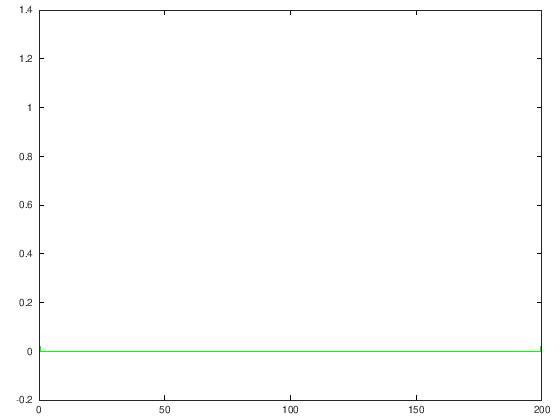

In [14]:
# Clear all variables
clear all
# Show numbers in a long, yet intuitive form
format long g
# Number of collocation points
N         = 1000;
NN        = 100000;
# Integration interval
xx0       = -100;
xxf       = 100;
# Vector
n         = 0:N;
# Extrema grid
x         = -cos(pi*n'/N);
# Transformation to [xx0, xxf]
xtrans    = (xxf-xx0)/2*x+(xxf+xx0)/2;
# linearly spaced grid
xlin      = linspace(-1,1,NN+1)';
Tlin      = cos(acos(xlin)*n);
xtranslin = (xlin+1)*(xxf-xx0)/2;
# Chebyshev polys of the first kind
T         = cos(acos(x)*n);
# Now for arrays that do not include the endpoints
xsub      = x(2:N);
Tsub      = T(2:N,:);
Usub      = diag(1./sqrt(1-xsub.^2))*sin(acos(xsub)*n);
dTsub     = Usub*diag(n);
# Add the endpoints
dT        = [-(n.^2).*(-1).^(n); dTsub ; (n).^2];
# LHS without a (coefficient vector)
dT         = 2/(xxf-xx0)*dT;
# D1
D1         = dT/T;
D2         = D1^2;
# RHS, essentially what we're trying to integrate
F         = zeros(N+1,1);
# H eq
H         = D2-diag((xtrans.^2)./sqrt(1+xtrans.^2));
# Initial condition; with definite integrals y(xx0) = 0
H(1,:)    = [1 zeros(1,N)];
H(N+1,:)  = [zeros(1,N) 1];
F(1)      = 1;
F(N+1)    = 1;
# coefficient vector
y         = H\F;
a         = T\y;
# y on the linear grid
ylin      = Tlin*a;
# y solved from ODE
#lsode_options("absolute tolerance", 1e-18);
#yode      = lsode("d2yxeminx", [1 0], xtranslin);
#diffodech = abs(yode(:,1)-ylin);
#errodech  = sqrt(diffodech'*diffodech/(NN+1));
#figure(1)
#semilogy(xtranslin,diffodech)
figure(1)
plot(xtranslin,ylin,'g')

In [10]:
errodech

errodech =

  8.989944685329251e-08  0.0003706287338294979
  0.0003706287338294979  1.749082551288987

